In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt

with open("snyk-report.json", "r") as file:
    snyk_data = json.load(file)


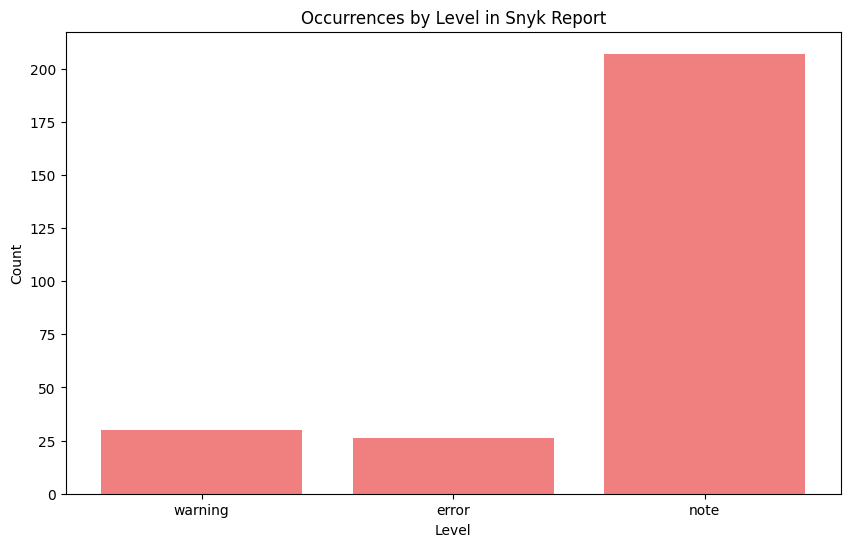

{'warning': 30, 'error': 26, 'note': 207}

In [7]:
# Extract results
results = snyk_data.get("runs", [])[0].get("results", [])

# Count occurrences by level
level_counts = {}
for result in results:
    level = result.get("level", "unknown")
    level_counts[level] = level_counts.get(level, 0) + 1

# Plot occurrences by level
levels = list(level_counts.keys())
counts = list(level_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(levels, counts, color='lightcoral')
plt.title("Occurrences by Level in Snyk Report")
plt.xlabel("Level")
plt.ylabel("Count")
plt.show()

level_counts

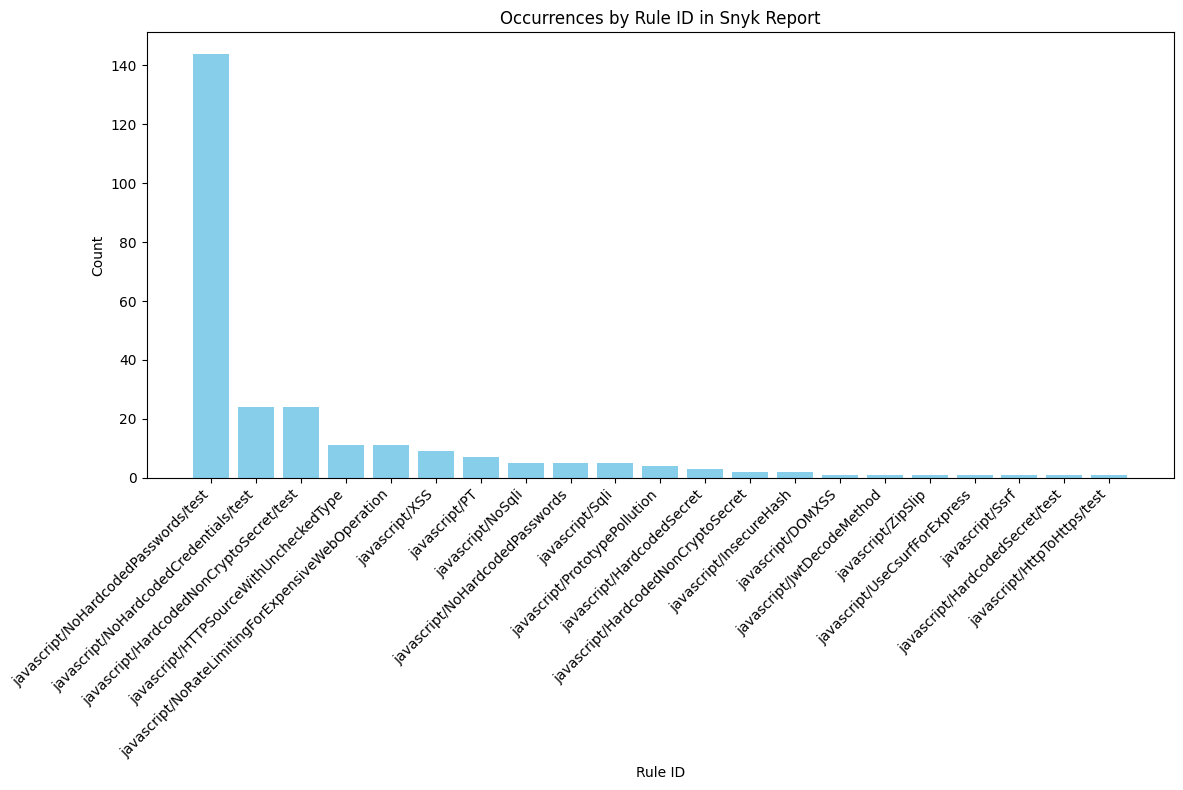

javascript/NoHardcodedPasswords/test: 144
javascript/NoHardcodedCredentials/test: 24
javascript/HardcodedNonCryptoSecret/test: 24
javascript/HTTPSourceWithUncheckedType: 11
javascript/NoRateLimitingForExpensiveWebOperation: 11
javascript/XSS: 9
javascript/PT: 7
javascript/NoSqli: 5
javascript/NoHardcodedPasswords: 5
javascript/Sqli: 5
javascript/PrototypePollution: 4
javascript/HardcodedSecret: 3
javascript/HardcodedNonCryptoSecret: 2
javascript/InsecureHash: 2
javascript/DOMXSS: 1
javascript/JwtDecodeMethod: 1
javascript/ZipSlip: 1
javascript/UseCsurfForExpress: 1
javascript/Ssrf: 1
javascript/HardcodedSecret/test: 1
javascript/HttpToHttps/test: 1


In [16]:
# Count occurrences by ruleId
rule_id_counts = {}
for result in results:
    rule_id = result.get("ruleId", "unknown")
    rule_id_counts[rule_id] = rule_id_counts.get(rule_id, 0) + 1

# Convert the counts into a sorted list for plotting
sorted_rule_ids = sorted(rule_id_counts.items(), key=lambda x: x[1], reverse=True)
rule_ids, counts = zip(*sorted_rule_ids)

# Plot the counts
plt.figure(figsize=(12, 8))
plt.bar(rule_ids, counts, color="skyblue")
plt.title("Occurrences by Rule ID in Snyk Report")
plt.xlabel("Rule ID")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Print the counts for reference
for rule_id, count in sorted_rule_ids:
    print(f"{rule_id}: {count}")

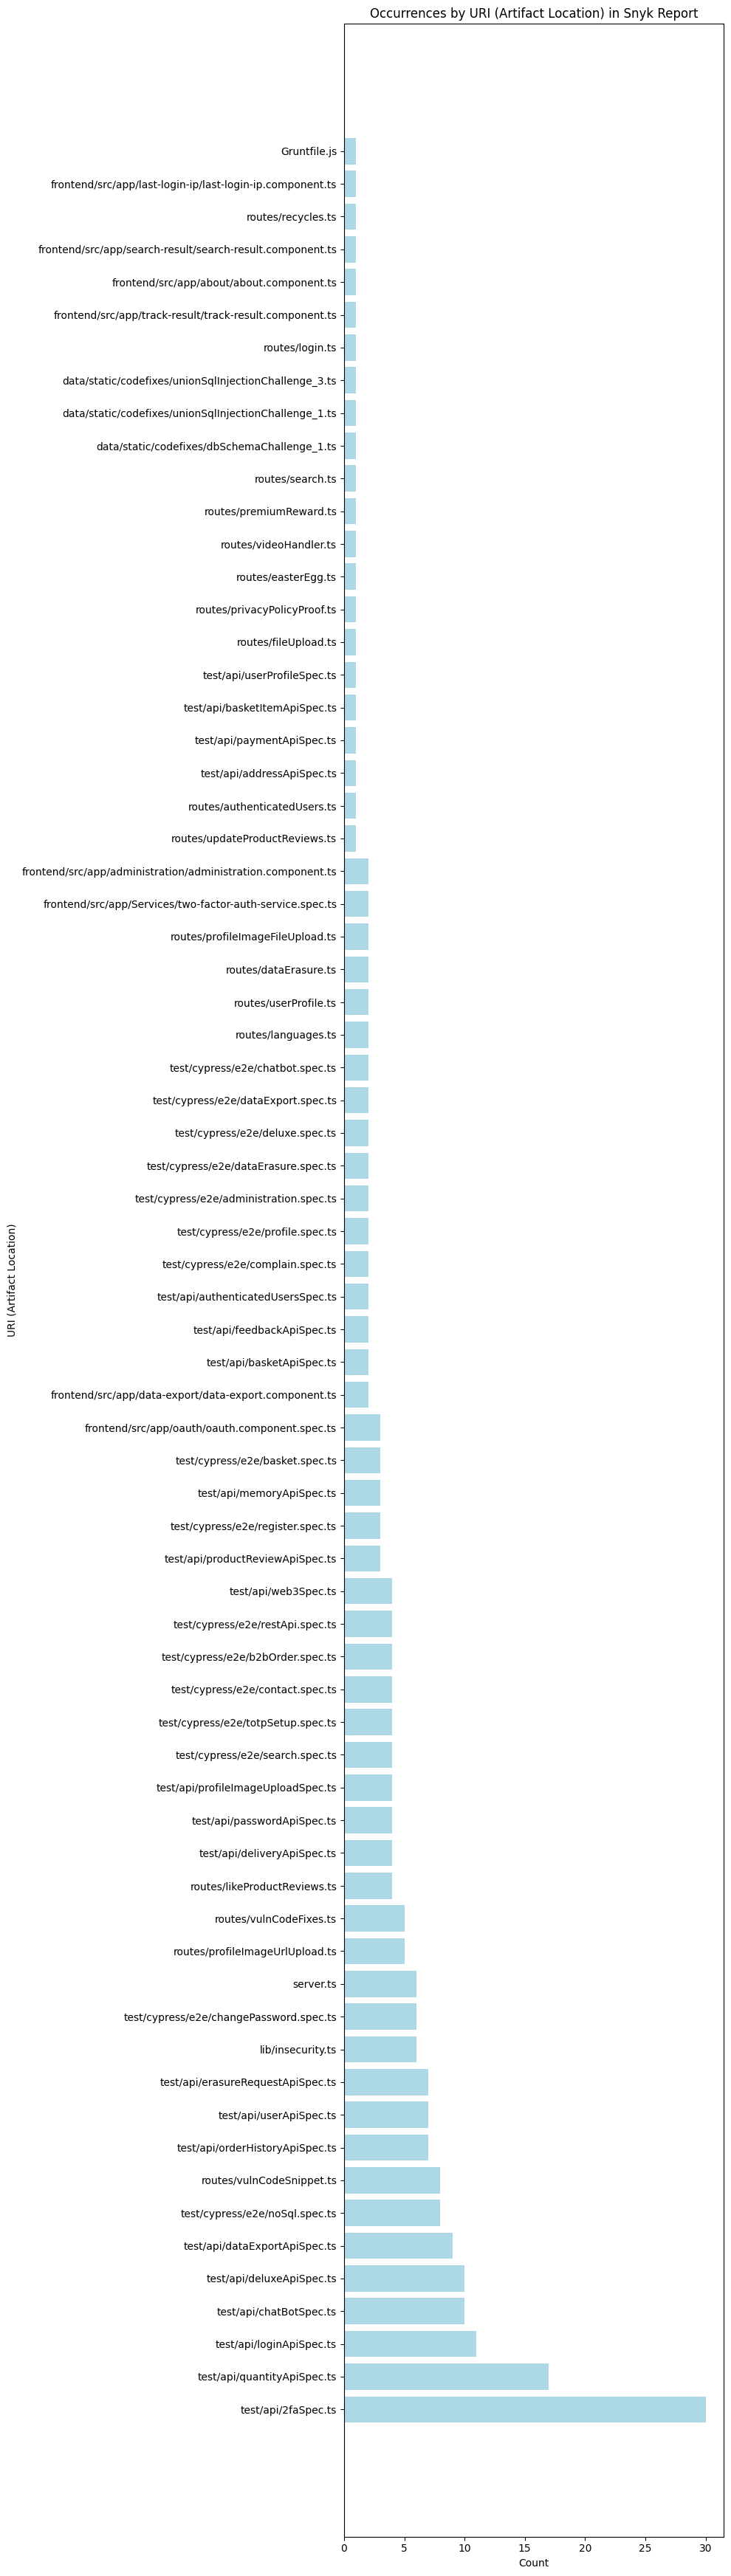

All URIs and Counts (Ordered):
test/api/2faSpec.ts: 30
test/api/quantityApiSpec.ts: 17
test/api/loginApiSpec.ts: 11
test/api/chatBotSpec.ts: 10
test/api/deluxeApiSpec.ts: 10
test/api/dataExportApiSpec.ts: 9
test/cypress/e2e/noSql.spec.ts: 8
routes/vulnCodeSnippet.ts: 8
test/api/orderHistoryApiSpec.ts: 7
test/api/userApiSpec.ts: 7
test/api/erasureRequestApiSpec.ts: 7
lib/insecurity.ts: 6
test/cypress/e2e/changePassword.spec.ts: 6
server.ts: 6
routes/profileImageUrlUpload.ts: 5
routes/vulnCodeFixes.ts: 5
routes/likeProductReviews.ts: 4
test/api/deliveryApiSpec.ts: 4
test/api/passwordApiSpec.ts: 4
test/api/profileImageUploadSpec.ts: 4
test/cypress/e2e/search.spec.ts: 4
test/cypress/e2e/totpSetup.spec.ts: 4
test/cypress/e2e/contact.spec.ts: 4
test/cypress/e2e/b2bOrder.spec.ts: 4
test/cypress/e2e/restApi.spec.ts: 4
test/api/web3Spec.ts: 4
test/api/productReviewApiSpec.ts: 3
test/cypress/e2e/register.spec.ts: 3
test/api/memoryApiSpec.ts: 3
test/cypress/e2e/basket.spec.ts: 3
frontend/src/app/

In [19]:
# Count occurrences by URI (artifact location)
uri_counts = {}
for result in results:
    locations = result.get("locations", [])
    for location in locations:
        uri = location.get("physicalLocation", {}).get("artifactLocation", {}).get("uri", "unknown")
        uri_counts[uri] = uri_counts.get(uri, 0) + 1

# Sort URIs by count
sorted_uris = sorted(uri_counts.items(), key=lambda x: x[1], reverse=True)

# Separate keys and values for plotting
uris = [item[0] for item in sorted_uris]
counts = [item[1] for item in sorted_uris]

# Plot all URIs in a vertical bar chart
plt.figure(figsize=(10, len(uris) * 0.5))
plt.barh(uris, counts, color="lightblue")
plt.title("Occurrences by URI (Artifact Location) in Snyk Report")
plt.xlabel("Count")
plt.ylabel("URI (Artifact Location)")
plt.tight_layout()
plt.show()

# Print all URI counts for reference
print("All URIs and Counts (Ordered):")
for uri, count in sorted_uris:
    print(f"{uri}: {count}")

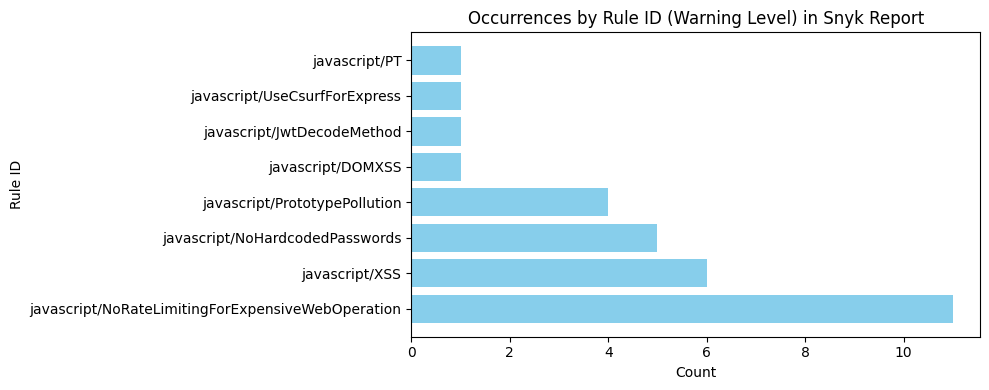


All Warning Level Rule IDs and Counts (Ordered):
javascript/NoRateLimitingForExpensiveWebOperation: 11
javascript/XSS: 6
javascript/NoHardcodedPasswords: 5
javascript/PrototypePollution: 4
javascript/DOMXSS: 1
javascript/JwtDecodeMethod: 1
javascript/UseCsurfForExpress: 1
javascript/PT: 1


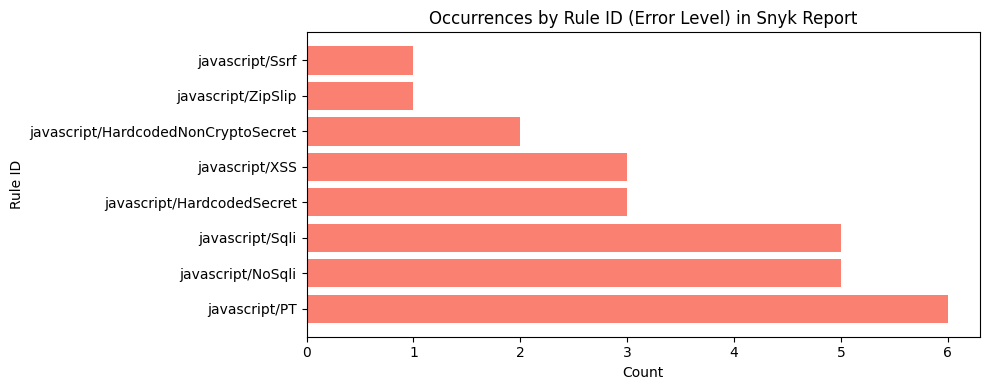


All Error Level Rule IDs and Counts (Ordered):
javascript/PT: 6
javascript/NoSqli: 5
javascript/Sqli: 5
javascript/HardcodedSecret: 3
javascript/XSS: 3
javascript/HardcodedNonCryptoSecret: 2
javascript/ZipSlip: 1
javascript/Ssrf: 1


In [21]:
# Extract results
results = snyk_data.get("runs", [])[0].get("results", [])

# Count occurrences by ruleId for warning and error levels
selected_levels = ["warning", "error"]
level_rule_counts = {"warning": {}, "error": {}}

for result in results:
    level = result.get("level")
    if level in selected_levels:
        rule_id = result.get("ruleId", "unknown")
        level_rule_counts[level][rule_id] = level_rule_counts[level].get(rule_id, 0) + 1

# Sort rule IDs by count for each level
sorted_rule_counts = {
    level: sorted(counts.items(), key=lambda x: x[1], reverse=True)
    for level, counts in level_rule_counts.items()
}

# Prepare data for visualization
for level, sorted_counts in sorted_rule_counts.items():
    rule_ids = [item[0] for item in sorted_counts]
    counts = [item[1] for item in sorted_counts]
    
    # Plot for each level
    plt.figure(figsize=(10, len(rule_ids) * 0.5))
    plt.barh(rule_ids, counts, color="skyblue" if level == "warning" else "salmon")
    plt.title(f"Occurrences by Rule ID ({level.capitalize()} Level) in Snyk Report")
    plt.xlabel("Count")
    plt.ylabel("Rule ID")
    plt.tight_layout()
    plt.show()
    
    # Print sorted counts for the level
    print(f"\nAll {level.capitalize()} Level Rule IDs and Counts (Ordered):")
    for rule_id, count in sorted_counts:
        print(f"{rule_id}: {count}")


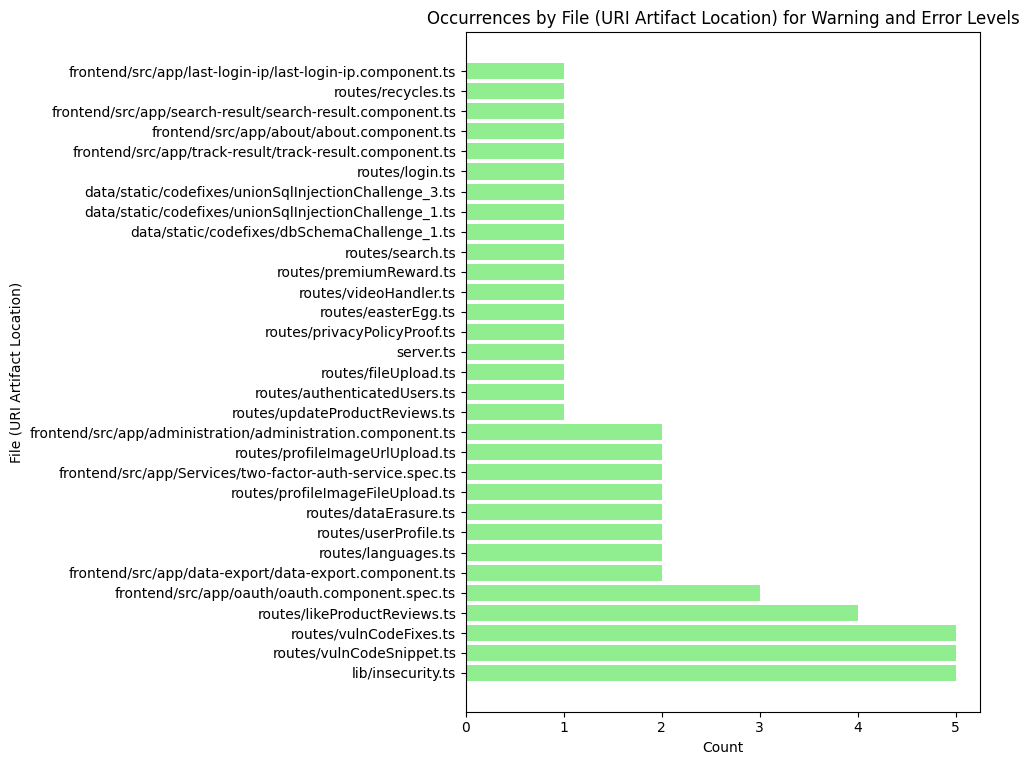


Occurrences by File (URI Artifact Location) for Warning and Error Levels:
lib/insecurity.ts: 5
routes/vulnCodeSnippet.ts: 5
routes/vulnCodeFixes.ts: 5
routes/likeProductReviews.ts: 4
frontend/src/app/oauth/oauth.component.spec.ts: 3
frontend/src/app/data-export/data-export.component.ts: 2
routes/languages.ts: 2
routes/userProfile.ts: 2
routes/dataErasure.ts: 2
routes/profileImageFileUpload.ts: 2
frontend/src/app/Services/two-factor-auth-service.spec.ts: 2
routes/profileImageUrlUpload.ts: 2
frontend/src/app/administration/administration.component.ts: 2
routes/updateProductReviews.ts: 1
routes/authenticatedUsers.ts: 1
routes/fileUpload.ts: 1
server.ts: 1
routes/privacyPolicyProof.ts: 1
routes/easterEgg.ts: 1
routes/videoHandler.ts: 1
routes/premiumReward.ts: 1
routes/search.ts: 1
data/static/codefixes/dbSchemaChallenge_1.ts: 1
data/static/codefixes/unionSqlInjectionChallenge_1.ts: 1
data/static/codefixes/unionSqlInjectionChallenge_3.ts: 1
routes/login.ts: 1
frontend/src/app/track-result

In [22]:
# Filter for warning and error levels and count occurrences by URI
selected_levels = ["warning", "error"]
file_counts = {}

for result in results:
    level = result.get("level")
    if level in selected_levels:
        locations = result.get("locations", [])
        for location in locations:
            uri = location.get("physicalLocation", {}).get("artifactLocation", {}).get("uri", "unknown")
            file_counts[uri] = file_counts.get(uri, 0) + 1

# Sort the counts by occurrence
sorted_file_counts = sorted(file_counts.items(), key=lambda x: x[1], reverse=True)

# Prepare data for visualization
files = [item[0] for item in sorted_file_counts]
counts = [item[1] for item in sorted_file_counts]

# Plot occurrences by file
plt.figure(figsize=(10, len(files) * 0.25))
plt.barh(files, counts, color='lightgreen')
plt.title("Occurrences by File (URI Artifact Location) for Warning and Error Levels")
plt.xlabel("Count")
plt.ylabel("File (URI Artifact Location)")
plt.tight_layout()
plt.show()

# Print sorted file counts
print("\nOccurrences by File (URI Artifact Location) for Warning and Error Levels:")
for file, count in sorted_file_counts:
    print(f"{file}: {count}")

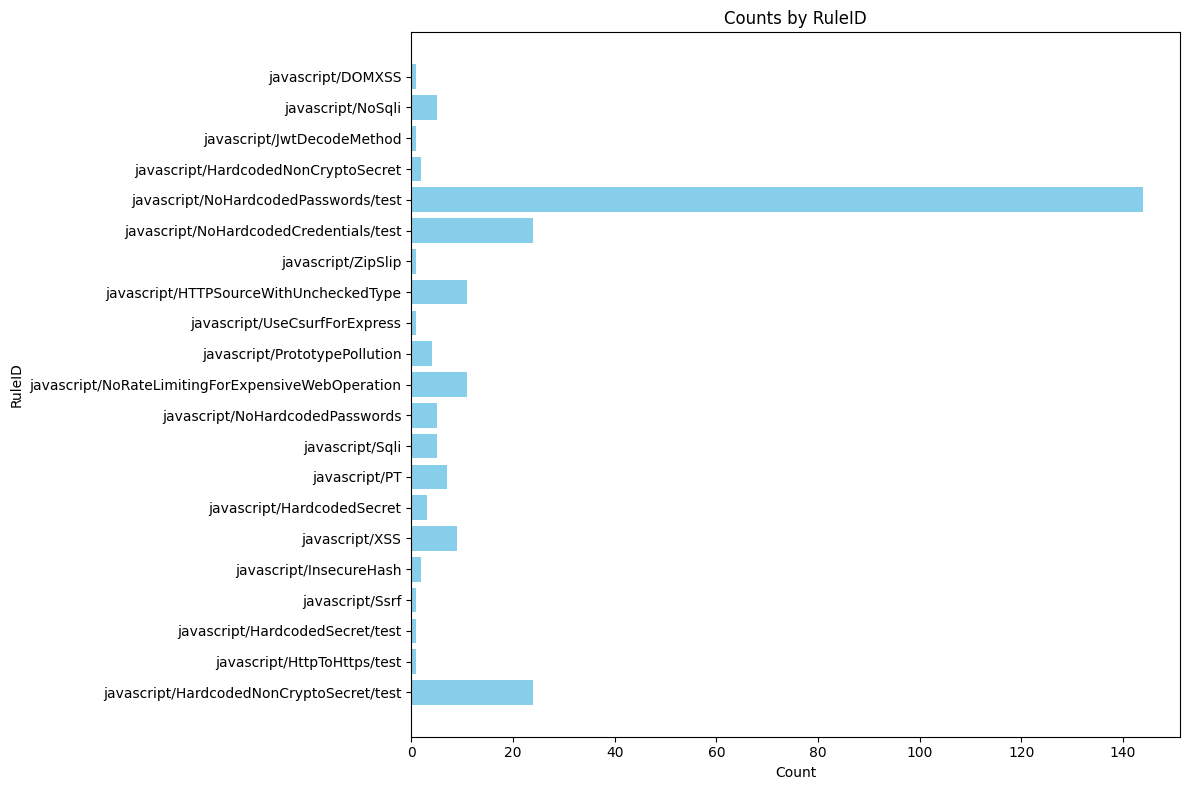

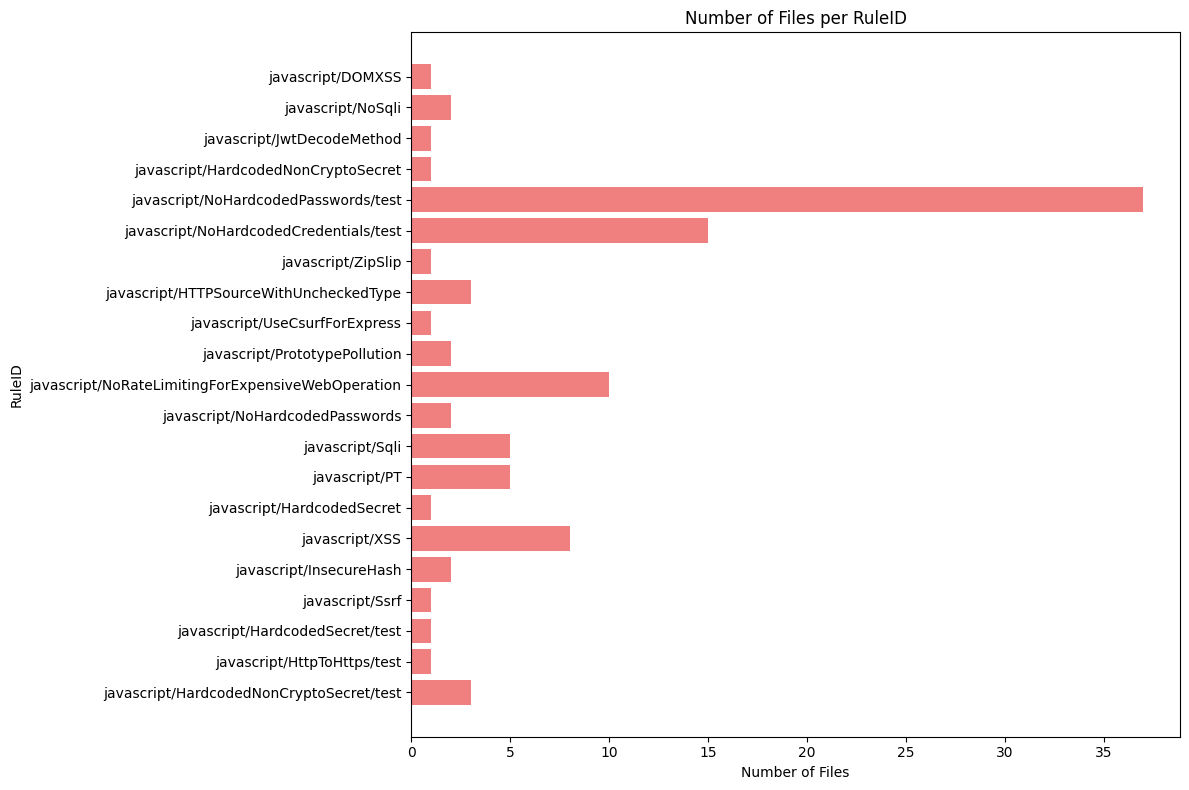

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the CSV file
rule_summary_path = "rule_summary.csv"
df = pd.read_csv(rule_summary_path)

# Plot 1: Bar chart for counts by RuleID
plt.figure(figsize=(12, 8))
plt.barh(df['ruleId'], df['count'], color='skyblue')
plt.title('Counts by RuleID')
plt.xlabel('Count')
plt.ylabel('RuleID')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot 2: Bar chart showing RuleID and corresponding number of files
df['file_count'] = df['uris'].apply(lambda x: len(eval(x)))  # Convert string to list and calculate length
plt.figure(figsize=(12, 8))
plt.barh(df['ruleId'], df['file_count'], color='lightcoral')
plt.title('Number of Files per RuleID')
plt.xlabel('Number of Files')
plt.ylabel('RuleID')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()